In [24]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [25]:
image = cv2.imread("image.jpg",cv2.IMREAD_GRAYSCALE)

In [26]:
def show_img(image):
    if image is not None:
        cv2.imshow("Image",image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Error!")

## High pass filter

In [27]:
high_pass_filter = np.array([[-1,-1,-1],
                             [-1,8,-1],
                             [-1,-1,1]])
high_pass_image = cv2.filter2D(image,-1,high_pass_filter)
show_img(high_pass_image)

## Low pass filter

In [28]:
n = 3 # it should be odd
total = n*n
low_pass_filter = 1/total*np.ones((n,n))
low_pass_image = cv2.filter2D(image,-1,low_pass_filter)
show_img(low_pass_image)

## Fourier Transform

In [29]:
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)
f_image = np.log(np.abs(f_transform_shifted)+1)  

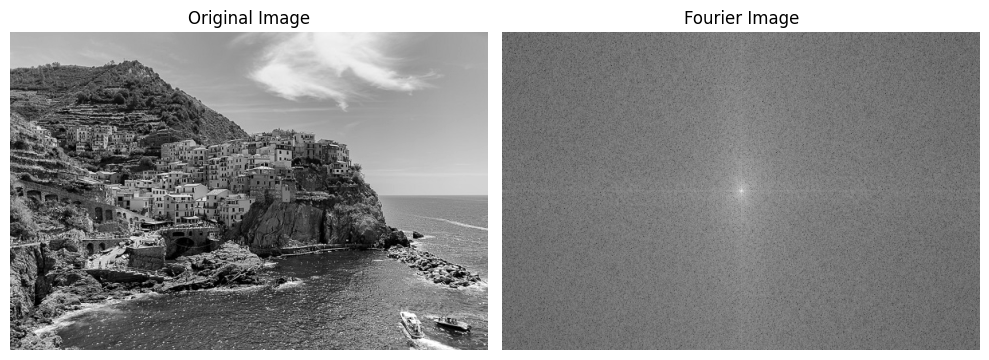

In [30]:
plt.figure(figsize=(10,12))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Fourier Image")
plt.imshow(f_image,cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()
